In [1]:
from dotenv import load_dotenv
import os
import requests
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np

In [2]:
load_dotenv('api.env')

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
alpaca = tradeapi.REST(
    alpaca_api_key,alpaca_secret_key,
    api_version="v2")

**For low risk tolerance**

In [6]:
symbol='SPY'
timeframe = '1H'
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()

In [7]:
from finta import TA
historical_data = alpaca.get_bars(symbol, timeframe, start=start_date).df
historical_data['delta']=historical_data['close'].diff()
historical_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.4400,209.240,209.300,30375,82,209.322606,NaN
2015-12-01 10:00:00+00:00,209.30,209.3600,209.070,209.360,54490,118,209.214253,0.060
2015-12-01 11:00:00+00:00,209.37,209.6500,209.370,209.440,44404,109,209.526441,0.080
2015-12-01 12:00:00+00:00,209.45,209.5900,209.330,209.510,111106,234,209.460429,0.070
2015-12-01 13:00:00+00:00,209.52,209.6700,209.270,209.320,426233,645,209.429479,-0.190
...,...,...,...,...,...,...,...,...
2023-03-28 16:00:00+00:00,396.06,396.1494,395.105,395.370,4405029,44864,395.515576,-0.670
2023-03-28 17:00:00+00:00,395.37,395.5000,393.690,393.845,7358176,66065,394.561469,-1.525
2023-03-28 18:00:00+00:00,393.84,394.9800,393.730,394.820,6629610,60162,394.382416,0.975


**For high risk tolerance**

In [8]:
symbol='EAST'
timeframe = '1H'
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
east_data= alpaca.get_bars(symbol, timeframe, start=start_date).df
east_data['delta']=east_data['close'].diff()
east_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2017-08-10 13:00:00+00:00,4.350000,4.3500,3.450000,3.500000,70776,196,3.673256,NaN
2017-08-10 14:00:00+00:00,3.500000,3.6000,3.350100,3.400000,41341,175,3.480739,-0.100000
2017-08-10 15:00:00+00:00,3.480000,3.5175,3.410000,3.510000,16624,104,3.495431,0.110000
2017-08-10 16:00:00+00:00,3.510000,3.5900,3.450000,3.490000,19577,67,3.505403,-0.020000
2017-08-10 17:00:00+00:00,3.490000,3.5500,3.480000,3.500000,15151,62,3.489088,0.010000
...,...,...,...,...,...,...,...,...
2023-03-28 15:00:00+00:00,0.260000,0.2650,0.260000,0.265000,1792,10,0.262365,0.005779
2023-03-28 16:00:00+00:00,0.269900,0.2700,0.265200,0.269900,13690,15,0.269442,0.004900
2023-03-28 17:00:00+00:00,0.269900,0.2700,0.269900,0.269999,900,3,0.269955,0.000099


**For medium risk tolerance**

In [9]:
symbol='AAPL'
timeframe = '1H'
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
apple_data= alpaca.get_bars(symbol, timeframe, start=start_date).df
apple_data['delta']=apple_data['close'].diff()
apple_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2015-12-01 09:00:00+00:00,118.88,118.94,118.600,118.6500,5825,15,118.696799,NaN
2015-12-01 10:00:00+00:00,118.65,118.72,118.500,118.7200,7077,24,118.585340,0.0700
2015-12-01 11:00:00+00:00,118.71,118.99,118.710,118.9000,14956,72,118.858641,0.1800
2015-12-01 12:00:00+00:00,118.88,118.98,118.760,118.9400,24677,129,118.857629,0.0400
2015-12-01 13:00:00+00:00,118.88,119.00,118.600,118.6300,95036,309,118.732677,-0.3100
...,...,...,...,...,...,...,...,...
2023-03-28 16:00:00+00:00,156.92,156.95,156.435,156.5400,3481419,36398,156.680996,-0.3700
2023-03-28 17:00:00+00:00,156.56,156.63,155.980,156.0850,4359893,44138,156.280241,-0.4550
2023-03-28 18:00:00+00:00,156.08,156.76,156.050,156.7350,3917591,36150,156.457895,0.6500


In [10]:
historical_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.4400,209.240,209.300,30375,82,209.322606,NaN
2015-12-01 10:00:00+00:00,209.30,209.3600,209.070,209.360,54490,118,209.214253,0.060
2015-12-01 11:00:00+00:00,209.37,209.6500,209.370,209.440,44404,109,209.526441,0.080
2015-12-01 12:00:00+00:00,209.45,209.5900,209.330,209.510,111106,234,209.460429,0.070
2015-12-01 13:00:00+00:00,209.52,209.6700,209.270,209.320,426233,645,209.429479,-0.190
...,...,...,...,...,...,...,...,...
2023-03-28 16:00:00+00:00,396.06,396.1494,395.105,395.370,4405029,44864,395.515576,-0.670
2023-03-28 17:00:00+00:00,395.37,395.5000,393.690,393.845,7358176,66065,394.561469,-1.525
2023-03-28 18:00:00+00:00,393.84,394.9800,393.730,394.820,6629610,60162,394.382416,0.975


**VWAP Trading Signal**

We decide to buy/sell at points where the market price crosses the vwap.

In [11]:
historical_data['Predicted-vwap']=np.where(historical_data['vwap']>=historical_data['close'], 1,0)
historical_data['vwap-entry/exit']=historical_data['Predicted-vwap'].diff()
historical_data


,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit
timestamp,,,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.4400,209.240,209.300,30375,82,209.322606,NaN,1,NaN
2015-12-01 10:00:00+00:00,209.30,209.3600,209.070,209.360,54490,118,209.214253,0.060,0,-1.0
2015-12-01 11:00:00+00:00,209.37,209.6500,209.370,209.440,44404,109,209.526441,0.080,1,1.0
2015-12-01 12:00:00+00:00,209.45,209.5900,209.330,209.510,111106,234,209.460429,0.070,0,-1.0
2015-12-01 13:00:00+00:00,209.52,209.6700,209.270,209.320,426233,645,209.429479,-0.190,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2023-03-28 16:00:00+00:00,396.06,396.1494,395.105,395.370,4405029,44864,395.515576,-0.670,1,1.0
2023-03-28 17:00:00+00:00,395.37,395.5000,393.690,393.845,7358176,66065,394.561469,-1.525,1,0.0
2023-03-28 18:00:00+00:00,393.84,394.9800,393.730,394.820,6629610,60162,394.382416,0.975,0,-1.0


**RSI**

The stock is considered overbought when the RSI rises above 70 and considered oversold when the RSI dips below 30 

In [12]:
import numpy as np

def calculate_rsi(price_diff, n=14):
    rsi=[0]*len(price_diff)
    #first n days
    up_mean=price_diff.head(n)[price_diff>0].mean(skipna=True)
    down_mean=abs(price_diff.head(n)[price_diff<=0].mean(skipna=True))
    rs=float(up_mean/down_mean)
    rsi[:n]=[100-(100/(1+rs))]*n

    for i in range(n,len(price_diff)):
        up_mean=price_diff[i-n:i][price_diff>0].mean()
        down_mean=abs(price_diff[i-n:i][price_diff<=0]).mean(skipna=True)
        rs=float(up_mean/down_mean)
        rsi[i]=100-(100/(1+rs))
    return rsi
historical_data['rsi'] = calculate_rsi(historical_data.loc[:,['delta']])



In [13]:
sma10=TA.SMA(historical_data,period=10)
historical_data['sma-10']=sma10
sma=[0]*len(historical_data['close'])
sum=0
close=historical_data['close']
for i in range(10):
    sum+=close[i]
avg=sum/10
historical_data.loc[historical_data.index[:10], 'sma-10'] = avg

sma50=TA.SMA(historical_data,period=50)
historical_data['sma-50']=sma50
sma=[0]*len(historical_data['close'])
sum=0
close=historical_data['close']
for i in range(50):
    sum+=close[i]
avg=sum/50
historical_data.loc[historical_data.index[:50], 'sma-50'] = avg

sma50=TA.SMA(historical_data,period=50)
historical_data['sma-50']=sma50
sma=[0]*len(historical_data['close'])
sum=0
close=historical_data['close']
for i in range(50):
    sum+=close[i]
avg=sum/50
historical_data.loc[historical_data.index[:50], 'sma-50'] = avg

sma200=TA.SMA(historical_data,period=200)
historical_data['sma-200']=sma200
sma=[0]*len(historical_data['close'])
sum=0
close=historical_data['close']
for i in range(200):
    sum+=close[i]
avg=sum/200
historical_data.loc[historical_data.index[:200], 'sma-200'] = avg

historical_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,rsi,sma-10,sma-50,sma-200
timestamp,,,,,,,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.4400,209.240,209.300,30375,82,209.322606,NaN,1,NaN,64.376590,209.65000,209.028698,206.709873
2015-12-01 10:00:00+00:00,209.30,209.3600,209.070,209.360,54490,118,209.214253,0.060,0,-1.0,64.376590,209.65000,209.028698,206.709873
2015-12-01 11:00:00+00:00,209.37,209.6500,209.370,209.440,44404,109,209.526441,0.080,1,1.0,64.376590,209.65000,209.028698,206.709873
2015-12-01 12:00:00+00:00,209.45,209.5900,209.330,209.510,111106,234,209.460429,0.070,0,-1.0,64.376590,209.65000,209.028698,206.709873
2015-12-01 13:00:00+00:00,209.52,209.6700,209.270,209.320,426233,645,209.429479,-0.190,1,1.0,64.376590,209.65000,209.028698,206.709873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 16:00:00+00:00,396.06,396.1494,395.105,395.370,4405029,44864,395.515576,-0.670,1,1.0,52.141931,395.83905,395.126206,392.559068
2023-03-28 17:00:00+00:00,395.37,395.5000,393.690,393.845,7358176,66065,394.561469,-1.525,1,0.0,45.560249,395.52255,395.067706,392.572842
2023-03-28 18:00:00+00:00,393.84,394.9800,393.730,394.820,6629610,60162,394.382416,0.975,0,-1.0,45.885634,395.38255,395.067706,392.591893


We can use RSI in conjunction with the moving average---where we buy when the RSI is below 30 and the price crosses above the moving average and we sell when the RSI is above 70 and the price crosses below the moving average 

In [14]:
historical_data['rsi with sma predicted'] = np.where(np.logical_and(historical_data['rsi'].diff() > 0, historical_data['sma-10'].diff() > 0), 1, 0)
historical_data['rsi entry/exit'] = historical_data['rsi with sma predicted'].diff()
#historical_data['rsi entry/exit'].sum()
historical_data['rsi entry/exit'].sum()
historical_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,rsi,sma-10,sma-50,sma-200,rsi with sma predicted,rsi entry/exit
timestamp,,,,,,,,,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.4400,209.240,209.300,30375,82,209.322606,NaN,1,NaN,64.376590,209.65000,209.028698,206.709873,0,NaN
2015-12-01 10:00:00+00:00,209.30,209.3600,209.070,209.360,54490,118,209.214253,0.060,0,-1.0,64.376590,209.65000,209.028698,206.709873,0,0.0
2015-12-01 11:00:00+00:00,209.37,209.6500,209.370,209.440,44404,109,209.526441,0.080,1,1.0,64.376590,209.65000,209.028698,206.709873,0,0.0
2015-12-01 12:00:00+00:00,209.45,209.5900,209.330,209.510,111106,234,209.460429,0.070,0,-1.0,64.376590,209.65000,209.028698,206.709873,0,0.0
2015-12-01 13:00:00+00:00,209.52,209.6700,209.270,209.320,426233,645,209.429479,-0.190,1,1.0,64.376590,209.65000,209.028698,206.709873,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 16:00:00+00:00,396.06,396.1494,395.105,395.370,4405029,44864,395.515576,-0.670,1,1.0,52.141931,395.83905,395.126206,392.559068,0,0.0
2023-03-28 17:00:00+00:00,395.37,395.5000,393.690,393.845,7358176,66065,394.561469,-1.525,1,0.0,45.560249,395.52255,395.067706,392.572842,0,0.0
2023-03-28 18:00:00+00:00,393.84,394.9800,393.730,394.820,6629610,60162,394.382416,0.975,0,-1.0,45.885634,395.38255,395.067706,392.591893,0,0.0


In [15]:
ema3 = TA.EMA(historical_data, period=3)
ema5 = TA.EMA(historical_data, period=5)
ema8 = TA.EMA(historical_data,period=8)
ema13 = TA.EMA(historical_data,period=13)
vwap=TA.VWAP(historical_data)


historical_data['ema-3']=ema3
historical_data['ema-5']=ema5
historical_data['ema-8']=ema8
historical_data['ema-13']=ema13

historical_data['Predicted ema-3']=np.where(historical_data['ema-3'].diff()>0, 1,0)
historical_data['ema-3-entry/exit']=historical_data['Predicted ema-3'].diff()

historical_data['Predicted ema-5']=np.where(historical_data['ema-5'].diff()>0, 1,0)
historical_data['ema-5-entry/exit']=historical_data['Predicted ema-5'].diff()


historical_data['Predicted ema-8']=np.where(historical_data['ema-8'].diff()>0, 1,0)
historical_data['ema-8-entry/exit']=historical_data['Predicted ema-8'].diff()

historical_data['Predicted ema-13']=np.where(historical_data['ema-13'].diff()>0, 1,0)
historical_data['ema-13-entry/exit']=historical_data['Predicted ema-13'].diff()



#just to confirm that this is accurate and matches with the vwap from alpaca


In [16]:
historical_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,...,ema-8,ema-13,Predicted ema-3,ema-3-entry/exit,Predicted ema-5,ema-5-entry/exit,Predicted ema-8,ema-8-entry/exit,Predicted ema-13,ema-13-entry/exit
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.4400,209.240,209.300,30375,82,209.322606,NaN,1,NaN,...,209.300000,209.300000,0,NaN,0,NaN,0,NaN,0,NaN
2015-12-01 10:00:00+00:00,209.30,209.3600,209.070,209.360,54490,118,209.214253,0.060,0,-1.0,...,209.333750,209.332308,1,1.0,1,1.0,1,1.0,1,1.0
2015-12-01 11:00:00+00:00,209.37,209.6500,209.370,209.440,44404,109,209.526441,0.080,1,1.0,...,209.378342,209.373858,1,0.0,1,0.0,1,0.0,1,0.0
2015-12-01 12:00:00+00:00,209.45,209.5900,209.330,209.510,111106,234,209.460429,0.070,0,-1.0,...,209.424486,209.416118,1,0.0,1,0.0,1,0.0,1,0.0
2015-12-01 13:00:00+00:00,209.52,209.6700,209.270,209.320,426233,645,209.429479,-0.190,1,1.0,...,209.392028,209.390564,0,-1.0,0,-1.0,0,-1.0,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 16:00:00+00:00,396.06,396.1494,395.105,395.370,4405029,44864,395.515576,-0.670,1,1.0,...,395.718548,395.917401,0,-1.0,0,-1.0,0,-1.0,0,-1.0
2023-03-28 17:00:00+00:00,395.37,395.5000,393.690,393.845,7358176,66065,394.561469,-1.525,1,0.0,...,395.302204,395.621344,0,0.0,0,0.0,0,0.0,0,0.0
2023-03-28 18:00:00+00:00,393.84,394.9800,393.730,394.820,6629610,60162,394.382416,0.975,0,-1.0,...,395.195047,395.506866,1,1.0,0,0.0,0,0.0,0,0.0


**Using Momentum Strategy**

In [17]:
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler

historical_data['Actual Returns']=historical_data["close"].pct_change().dropna()
#momentum_returns["close"]
historical_data['momentum predicted']=np.where(historical_data['Actual Returns']>0,1,0)
historical_data['momentum entry/exit']=historical_data['momentum predicted'].diff()
historical_data=historical_data.dropna()
#[(momentum_returns['Actual Returns'] >= 0), 'Signal'] = 1


X=historical_data[['vwap','ema-8','rsi']].shift().dropna()
y=historical_data['momentum predicted']
X=X.drop(X.index[0])



training_begin = X.index.min()
training_end = X.index.min() + DateOffset(years=9)

X_train = X.loc[training_begin:training_end]
y_train = y[training_begin:training_end]

X_test=X.loc[training_begin:]
y_test=y[training_begin:]
# Review the X_train DataFrame

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


display(X_train.head())
display(X_train.tail())
display(historical_data)

,vwap,ema-8,rsi
timestamp,,,
2015-12-01 12:00:00+00:00,209.526441,209.378342,64.37659
2015-12-01 13:00:00+00:00,209.460429,209.424486,64.37659
2015-12-01 14:00:00+00:00,209.429479,209.392028,64.37659
2015-12-01 15:00:00+00:00,209.919808,209.634043,64.37659
2015-12-01 16:00:00+00:00,209.658585,209.702753,64.37659


,vwap,ema-8,rsi
timestamp,,,
2023-03-28 16:00:00+00:00,395.652093,395.818133,45.453972
2023-03-28 17:00:00+00:00,395.515576,395.718548,52.141931
2023-03-28 18:00:00+00:00,394.561469,395.302204,45.560249
2023-03-28 19:00:00+00:00,394.382416,395.195047,45.885634
2023-03-28 20:00:00+00:00,395.164554,395.296148,50.799578


,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,...,ema-3-entry/exit,Predicted ema-5,ema-5-entry/exit,Predicted ema-8,ema-8-entry/exit,Predicted ema-13,ema-13-entry/exit,Actual Returns,momentum predicted,momentum entry/exit
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-01 10:00:00+00:00,209.30,209.3600,209.070,209.360,54490,118,209.214253,0.060,0,-1.0,...,1.0,1,1.0,1,1.0,1,1.0,0.000287,1,1.0
2015-12-01 11:00:00+00:00,209.37,209.6500,209.370,209.440,44404,109,209.526441,0.080,1,1.0,...,0.0,1,0.0,1,0.0,1,0.0,0.000382,1,0.0
2015-12-01 12:00:00+00:00,209.45,209.5900,209.330,209.510,111106,234,209.460429,0.070,0,-1.0,...,0.0,1,0.0,1,0.0,1,0.0,0.000334,1,0.0
2015-12-01 13:00:00+00:00,209.52,209.6700,209.270,209.320,426233,645,209.429479,-0.190,1,1.0,...,-1.0,0,-1.0,0,-1.0,0,-1.0,-0.000907,0,-1.0
2015-12-01 14:00:00+00:00,209.32,210.3900,209.310,210.240,12765789,49078,209.919808,0.920,0,-1.0,...,1.0,1,1.0,1,1.0,1,1.0,0.004395,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 16:00:00+00:00,396.06,396.1494,395.105,395.370,4405029,44864,395.515576,-0.670,1,1.0,...,-1.0,0,-1.0,0,-1.0,0,-1.0,-0.001692,0,-1.0
2023-03-28 17:00:00+00:00,395.37,395.5000,393.690,393.845,7358176,66065,394.561469,-1.525,1,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-0.003857,0,0.0
2023-03-28 18:00:00+00:00,393.84,394.9800,393.730,394.820,6629610,60162,394.382416,0.975,0,-1.0,...,1.0,0,0.0,0,0.0,0,0.0,0.002476,1,1.0


In [18]:
y_train

timestamp
2015-12-01 12:00:00+00:00    1
2015-12-01 13:00:00+00:00    0
2015-12-01 14:00:00+00:00    1
2015-12-01 15:00:00+00:00    0
2015-12-01 16:00:00+00:00    0
                            ..
2023-03-28 16:00:00+00:00    0
2023-03-28 17:00:00+00:00    0
2023-03-28 18:00:00+00:00    1
2023-03-28 19:00:00+00:00    1
2023-03-28 20:00:00+00:00    1
Name: momentum predicted, Length: 30512, dtype: int64

In [19]:
display(len(X_train))
display(len(y_train))

30512

30512

In [21]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
mlp_model=mlp_clf.fit(X_train,y_train)
mlp_pred=mlp_model.predict(X_test)
display(mlp_pred)


array([0, 0, 0, ..., 1, 1, 1])

In [27]:
display(len(y_train))
display(y_train)
display(len(X_train))

30512

timestamp
2015-12-01 12:00:00+00:00    1
2015-12-01 13:00:00+00:00    0
2015-12-01 14:00:00+00:00    1
2015-12-01 15:00:00+00:00    0
2015-12-01 16:00:00+00:00    0
                            ..
2023-03-28 16:00:00+00:00    0
2023-03-28 17:00:00+00:00    0
2023-03-28 18:00:00+00:00    1
2023-03-28 19:00:00+00:00    1
2023-03-28 20:00:00+00:00    1
Name: momentum predicted, Length: 30512, dtype: int64

30512

In [33]:
display(len(mlp_pred))
display(mlp_pred)
historical_data_copy=historical_data.copy()
historical_data_copy = historical_data_copy.drop(index=historical_data_copy.index[:2])

display(len(historical_data_copy['Actual Returns']))

30512

array([0, 0, 0, ..., 1, 1, 1])

30512

In [38]:
historical_data_copy['mlp predictions'] = mlp_pred
#historical_data['strategy returns']=historical_data['Actual Returns']*historical_data['mlp predictions']
historical_data_copy['mlp returns']=historical_data_copy['mlp predictions']*historical_data_copy['Actual Returns']


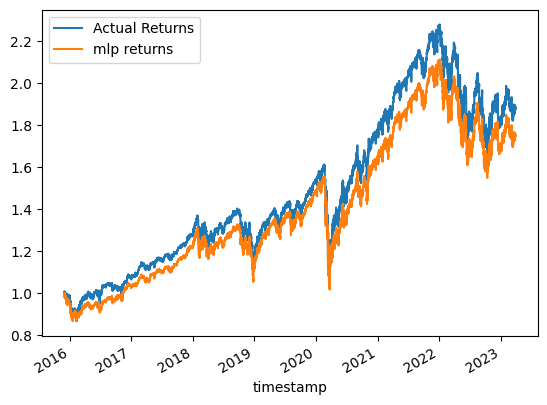

In [39]:
plot=(1+historical_data_copy[['Actual Returns','mlp returns']]).cumprod().plot()
